![](https://img.freepik.com/vetores-gratis/conceito-de-saude-de-auto-cuidado_23-2148517202.jpg)

# Introdução

  Esta análise é sobre o mercado de dispositivos de inteligência na área de saúde feminina, para a empresa Bellabeat, com foco especial no crescimento da empresa através de análise de dados para novas tendências.
  Bellabeat é uma pequena empresa fabricante de produtos de alta tecnologia voltados à saúde da mulher e, por ter potencial para adquirir maior participação no mercado global de dispositivos inteligentes, a CEO da Bellabeat acredita que encontrarão novas oportunidades de crescimento através da análise de dados de condicionamento físico a partir de dispositivos inteligentes.
Os conjuntos de dados utilizados nesta análise foram gerados pelos participantes de uma pesquisa distribuída entre 12.03.2016 e 12.05.2016. Foram observados os dados de trinta usuários qualificados do Fitbit que consentiram o envio de dados pessoais como: o resultado em nível de minuto para atividade física, frequência cardíaca e monitoramento do sono.
	Esperamos que esta análise esclareça qualquer dúvida quanto às etapas de análise necessária para o aprimoramento da empresa em questão.

# Análise dos Dados

**1. Tarefa de Negócios**

Identificar tendências na utilização de dispositivos inteligentes Fitbit para obter informações sobre como os consumidores estão usando estes dispositivos,  retirar insights importantes que ajudarão a orientar a estratégia de marketing da empresa e aplicar em um produto da BellaBeat.

Partes interessadas:

* **Urška Sršen:** Cofundadora e CEO da Bellabeat
* **Sando Mur:** Matemático e cofundador da Bellabeat;
* **Equipe de análise de marketing da Bellabeat**


**2. Descrição da fonte de dados usada**

Foi usado o [Dataset FitBit Fitness Tracker](kaggle.com/datasets/arashnic/fitbit), disponibilizado por Mobius. São dados do rastreamento de condicionamento físico dos envios consentidos pelos usuários sobre a utilização do dispositivo Fitbit. 
O conjunto de dados analisado são dados abertos, ou seja, estão disponíveis para o público, mas não contém imparcialidade e não é atual, pois foram fornecidos dados pessoais de apenas 33 pessoas no período de 12.03.2016 e 12.05.2016, pela Amazon Mechanical Turk.


**3. Processar e limpar dados**

Os conjuntos de dados foram analisados no programa RStudio, aproveitando da alta funcionalidade da linguagem R. Foram aplicadas importação dos arquivos, remoção de duplicatas, certificação de dados únicos e consistentes, formatação numérica quando necessário, realizada a média de comparação e gráficos de comparação.

Documentação de qualquer limpeza ou manipulação de dados:




## Instalação

In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("janitor")
install.packages("ggplot2")
library(tidyverse)
library(dplyr)
library(janitor)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The fol

## Import FitBit

In [2]:
# importando planilhas

df_dailyactivity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df_sleepday<- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
df_calorie <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")

## Limpeza

In [3]:
#Visualizacao das 6 primeiras linhas

head(df_dailyactivity)
head(df_sleepday)
head(df_calorie)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityMinute,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,0.7865
2,1503960366,4/12/2016 12:01:00 AM,0.7865
3,1503960366,4/12/2016 12:02:00 AM,0.7865
4,1503960366,4/12/2016 12:03:00 AM,0.7865
5,1503960366,4/12/2016 12:04:00 AM,0.7865
6,1503960366,4/12/2016 12:05:00 AM,0.9438


In [4]:
# Id distinto

n_distinct(df_dailyactivity$Id)
n_distinct(df_sleepday$Id)
n_distinct(df_calorie$Id)

[1] 33

[1] 24

[1] 33

**Note:** A partir dessa análise, foi constatado que há 33 participantes distintos, mas foi contabilizado apenas 24 dados de sono.

In [5]:
dim(df_dailyactivity)
dim(df_sleepday)
dim(df_calorie)

[1] 940  15

[1] 413   5

[1] 1325580       3

In [6]:
# Exibe as informaçoes do arquivo

str(df_dailyactivity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [7]:
# Certifica que os nomes das colunas são únicos e consistentes

df_dailyactivity <- df_dailyactivity %>%
  drop_na() %>%
  distinct() %>%
  clean_names()

df_sleepday <- df_sleepday %>%
  drop_na() %>%
  distinct() %>%
  clean_names()

df_calorie <- df_calorie %>%
  drop_na() %>%
  distinct() %>%
  clean_names()

In [8]:
# Média de passos por participante

mean_step_daily <- df_dailyactivity %>%
  group_by(id) %>%
  summarize(mean_steps = mean(total_steps)) 

head(mean_step_daily)

id,mean_steps
<dbl>,<dbl>
1503960366,12116.742
1624580081,5743.903
1644430081,7282.967
1844505072,2580.065
1927972279,916.129
2022484408,11370.645


In [9]:
# Média total de passos

mean_step <- df_dailyactivity %>%
  summarize(mean_steps = mean(total_steps)) 

mean_step

mean_steps
<dbl>
7637.911


**Nota:** De acordo com a OMS, 10 mil passos por dia é a quantidade de exercício necessária para se manter saudável. A maioria dos participantes caminham em média 7 mil  passos apenas.

In [10]:
# Média de tempo na cama

mean_sleep <- df_sleepday %>% 
  group_by(id) %>%
  summarize(mean_sleep = mean(total_time_in_bed))

head(mean_sleep)

id,mean_sleep
<dbl>,<dbl>
1503960366,383.2000
1644430081,346.0000
1844505072,961.0000
1927972279,437.8000
2026352035,537.6429
2320127002,69.0000


In [11]:
# Média total na cama

mean_s <- df_sleepday %>% 
  summarize(mean_s = mean(total_time_in_bed))

mean_s

mean_s
<dbl>
458.4829


**Note:** Observamos que apenas 24 dos participantes contabilizaram as horas na cama, e a média dos dados é de 7h.

In [12]:
# Média das calorias por participantes
mean_calories <- df_calorie %>%
  group_by(id) %>%
  summarize(mean = mean(calories))

head(mean_calories)

id,mean
<dbl>,<dbl>
1503960366,1.308458
1624580081,1.040579
1644430081,1.982551
1844505072,1.111422
1927972279,1.524636
2022484408,1.759459


In [13]:
# Média total
mean_c <- df_calorie %>%
  summarize(mean_c = mean(calories))

mean_c

mean_c
<dbl>
1.62313


**Note:** Observamos os dados dos participantes e obtivemos uma média de 1600 calorias por dia.

## Gráficos de comparação

`geom_smooth()` using formula = 'y ~ x'


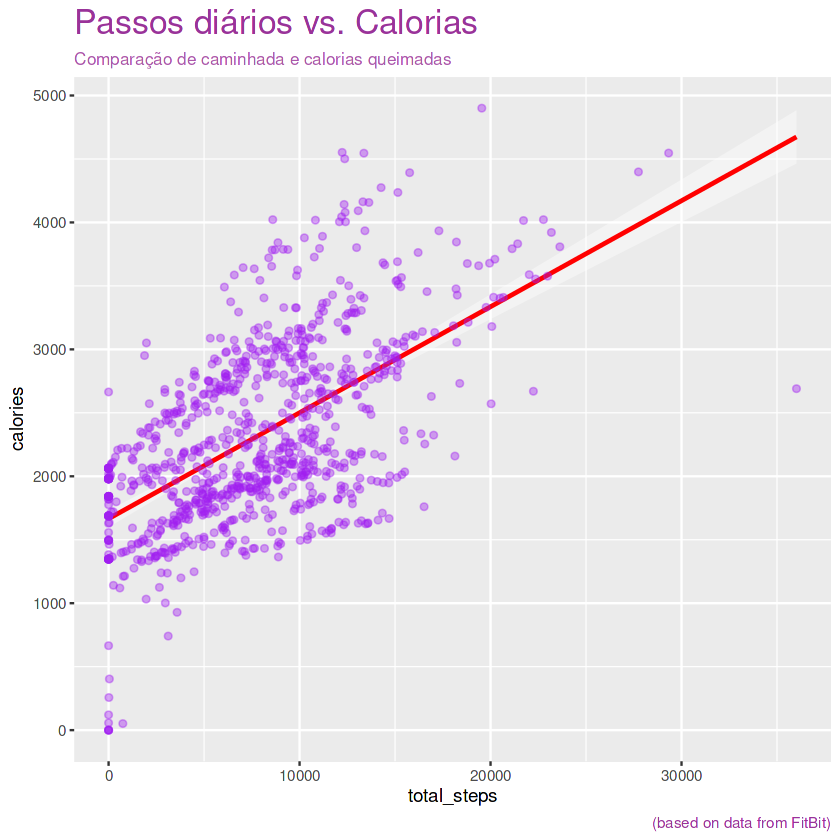

In [14]:
ggplot(data=df_dailyactivity, aes(x=total_steps, y=calories)) +  
  stat_smooth(method = "lm", color="red", fill="white") + 
  geom_point(alpha=0.4, position = position_jitter(), color="purple") +
  labs(title = "Passos diários vs. Calorias", subtitle = "Comparação de caminhada e calorias queimadas", caption = "(based on data from FitBit)") +
  theme(plot.title = element_text(size=20, color="#993399"), plot.subtitle = element_text(size=10, color = "#ac58aa"), plot.caption = element_text(color="#993399"))

**Note:** Há correlação de passos dados em um dia e as calorias que foram queimadas.

`geom_smooth()` using formula = 'y ~ x'


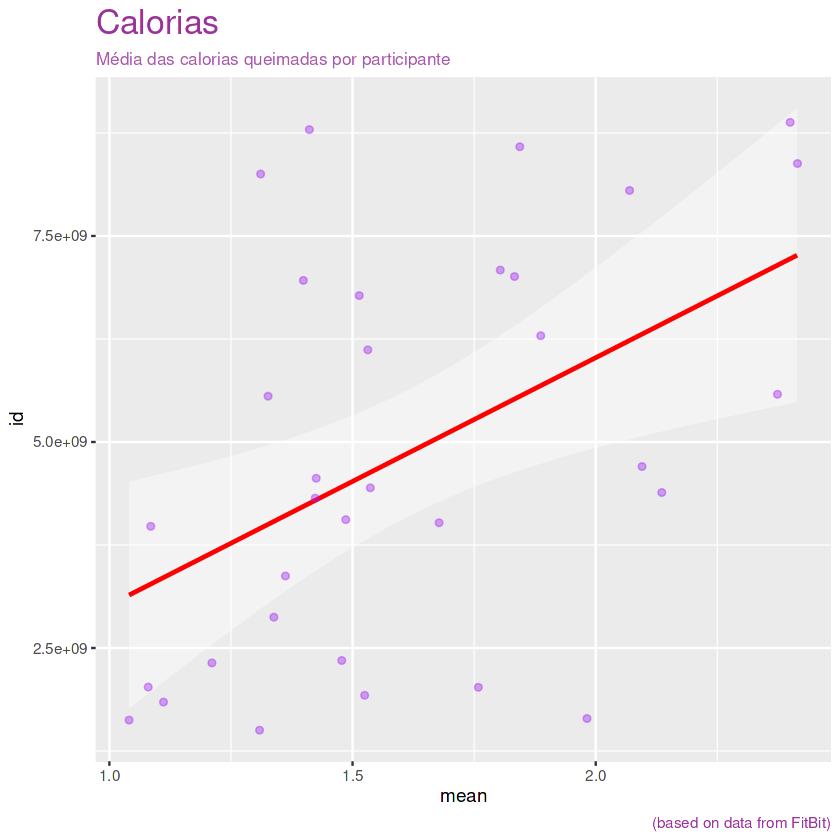

In [15]:
ggplot(data = mean_calories, aes(x=mean, y=id)) + stat_smooth(method = "lm", color="red", fill="white") +
  geom_point(alpha=0.4, position = position_jitter(), color="purple") +
  labs(title = "Calorias", subtitle = "Média das calorias queimadas por participante", caption = "(based on data from FitBit)") +
  theme(plot.title = element_text(size=20, color="#993399"), plot.subtitle = element_text(size=10, color = "#ac58aa"), plot.caption = element_text(color="#993399"))

**Note:** A média das calorias queimadas por participante mostra a diversidade de cada um.

`geom_smooth()` using formula = 'y ~ x'


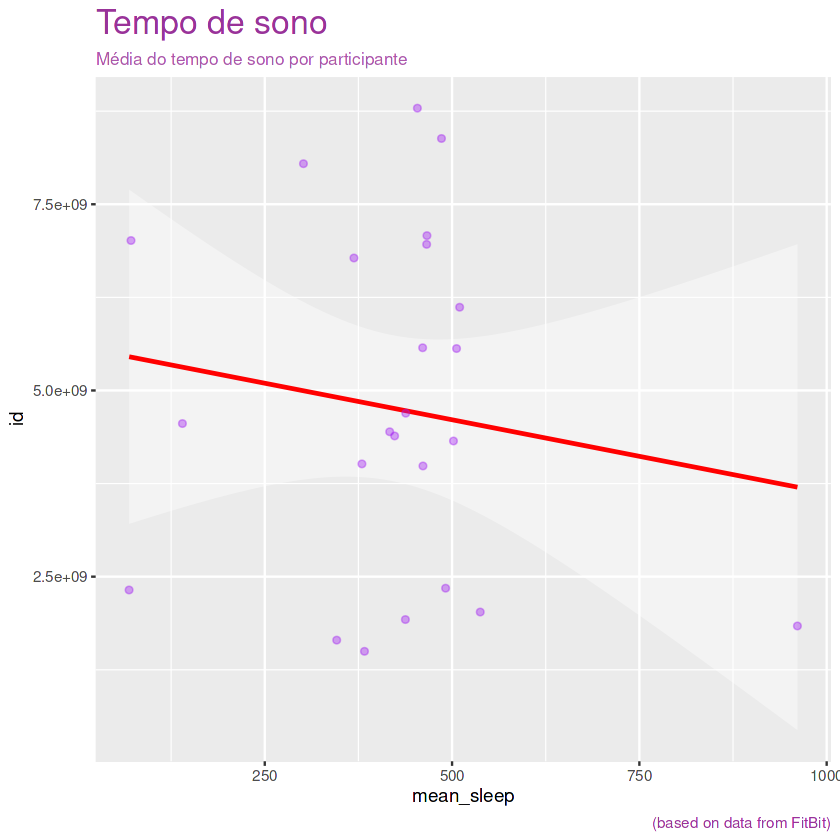

In [16]:
ggplot(data = mean_sleep, aes(x=mean_sleep, y=id)) + stat_smooth(method = "lm", color="red", fill="white") +
  geom_point(alpha=0.4, position = position_jitter(), color="purple") +
  labs(title = "Tempo de sono", subtitle = "Média do tempo de sono por participante", caption = "(based on data from FitBit)") +
  theme(plot.title = element_text(size=20, color="#993399"), plot.subtitle = element_text(size=10, color = "#ac58aa"), plot.caption = element_text(color="#993399"))

`geom_smooth()` using formula = 'y ~ x'


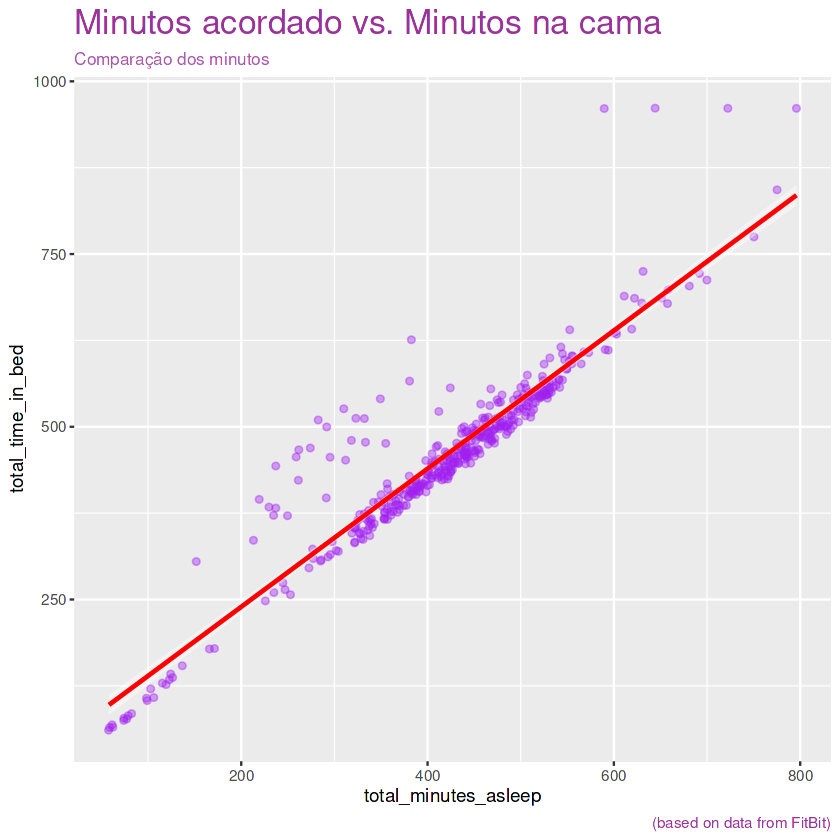

In [17]:
ggplot(data=df_sleepday, aes(x=total_minutes_asleep, y=total_time_in_bed)) + geom_point(alpha=0.4, position = position_jitter(), color="purple") + stat_smooth(method = "lm", color="red", fill="white") +
  labs(title = "Minutos acordado vs. Minutos na cama", subtitle = "Comparação dos minutos", caption = "(based on data from FitBit)") +
  theme(plot.title = element_text(size=20, color="#993399"), plot.subtitle = element_text(size=10, color = "#ac58aa"), plot.caption = element_text(color="#993399"))

`geom_smooth()` using formula = 'y ~ x'


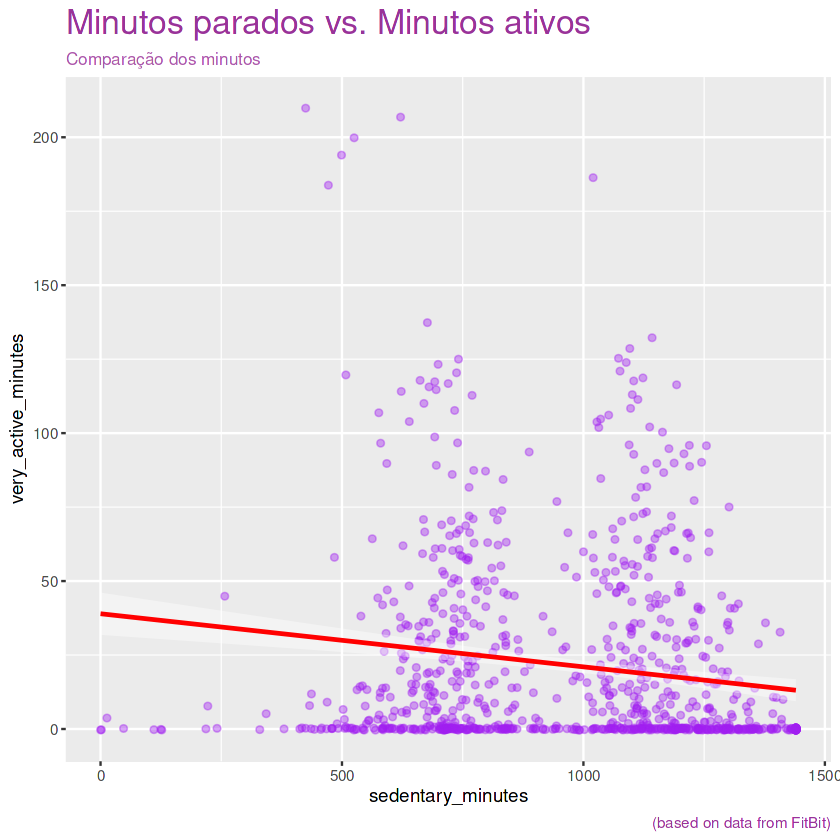

In [18]:
ggplot(data=df_dailyactivity, aes(x=sedentary_minutes, y=very_active_minutes)) + 
  geom_point(alpha=0.4, position = position_jitter(), color="purple") + 
  stat_smooth(method = "lm", color="red", fill="white") +
  labs(title = "Minutos parados vs. Minutos ativos", subtitle = "Comparação dos minutos", caption = "(based on data from FitBit)") +
  theme(plot.title = element_text(size=20, color="#993399"), plot.subtitle = element_text(size=10, color = "#ac58aa"), plot.caption = element_text(color="#993399"))

**Note:** Nota-se uma ligeira inclinação, abordando a provável falta de utilização do dispositivo em alguns momentos do dia.

## Finalização

Como mencionado anteriormente, a **Bellabeat**, uma empresa de alta tecnologia que fabrica produtos inteligentes fundada em 2013, cresceu e continua crescendo na indústria trazendo preocupação constante na área da saúde e bem-estar feminino. E esse apreço permitiu que mais mulheres se conhecessem e procurassem melhorar sua própria saúde e hábitos.

Após analisar os dados do *Fibit* encontramos insights que viriam a nos ajudar na criação de novas tendências de negócios.

O público alvo da empresa seria as mulheres, as que trabalham, as que ficam em casa e as que trabalham em casa. Estas, que desejam e necessitam realizar alguma atividade, leve ou moderada, para que se mantenham saudáveis e tenham um dia melhor, precisam de algum tipo de medidor para constatarem estar no caminho certo. 

Os dispositivos inteligentes já ajudam de alguma forma, mas podemos melhorar, por exemplo:
* na área de recomendações de atividades caso o participante deseje perder peso, 
* sugestões de alimentação,
* documentação dos registros de horários que equilibrem com a rotina do participante, 
* notificações para lembrar horários como hora de dormir, hora de beber água, 
* indicações de maneiras de dormir melhor, 
* lembrar de sempre utilizar os dispositivos para que as notificações estejam de acordo com a rotina,
* uma pequena competição para usar de incentivo a sempre estar buscando resultados melhores, 
* notificações para exibir as mudanças ao longo do tempo.

A partir disso, aprimorar os dispositivos para que sejam seguros, leves, duradouros, elegantes, resistentes e criar campanhas sobre a importância de manter a saúde em dia.

Por fim, me despeço. Este é meu primeiro projeto de estudo de caso em R analisando dados sobre dispositivos inteligentes para obter insights que ajudarão na estratégia de marketing da empresa Bellabeat. 
Sigo em busca de novos conhecimentos para essa jornada na área de dados.

Obrigada por continuarem comigo até aqui!

